In [1]:
data  = pd.read_csv("crop_production.csv")

<IPython.core.display.Javascript object>

In [2]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
data.shape

(246091, 7)

In [4]:
data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [5]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


### Finding missing values

In [6]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

<IPython.core.display.Javascript object>

<Axes: >

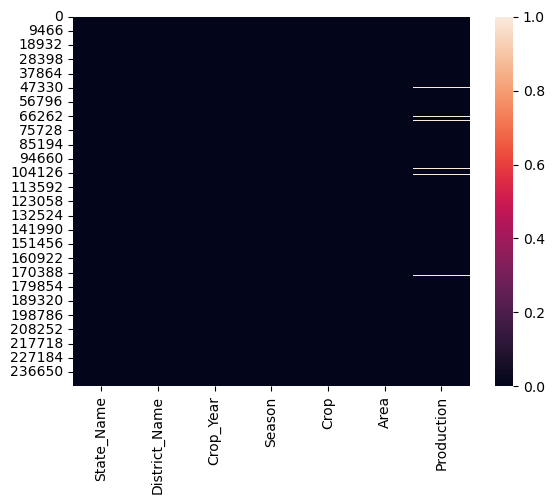

In [7]:
sns.heatmap(data.isnull())

### Replacing missing values

In [8]:
data_copy = data.copy()

In [9]:
data_copy['Production'] = data_copy['Production'].fillna(data_copy.groupby('Season')['Production'].transform('mean'))

In [10]:
data_copy.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

<IPython.core.display.Javascript object>

<Axes: >

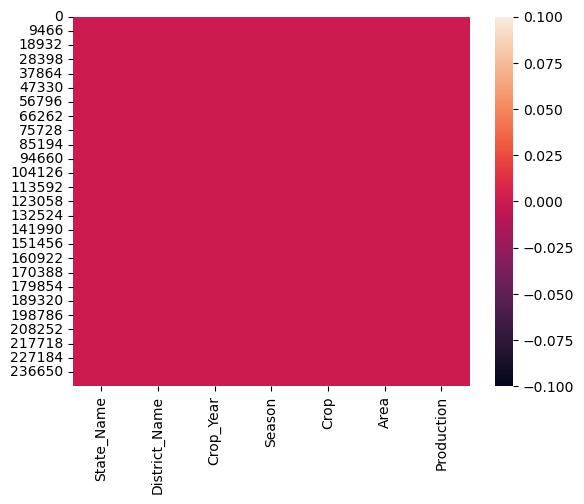

In [11]:
sns.heatmap(data_copy.isnull())

In [12]:
data_copy.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


### Exploratory Data Analysis

#### All States Frequency chart

In [13]:
state_count = data_copy['State_Name'].value_counts()
state_count

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

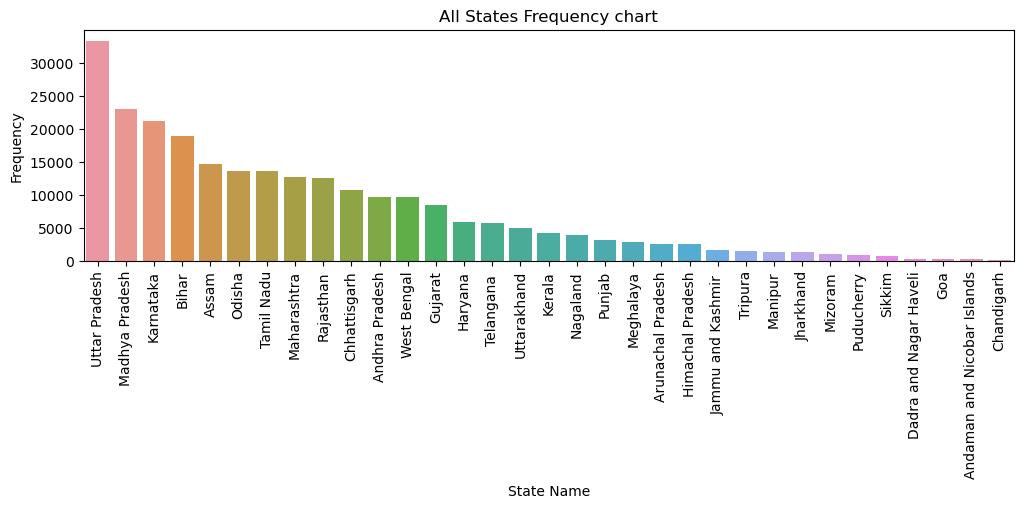

In [14]:
plt.figure(figsize = (12,3))
sns.countplot(data = data_copy, x = 'State_Name', order = state_count.index)
plt.xticks(rotation = 90)
plt.title('All States Frequency chart')
plt.xlabel('State Name')
plt.ylabel('Frequency')
plt.show()

#### Season Frequency chart

In [15]:
season_count = data_copy['Season'].value_counts()
season_count

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

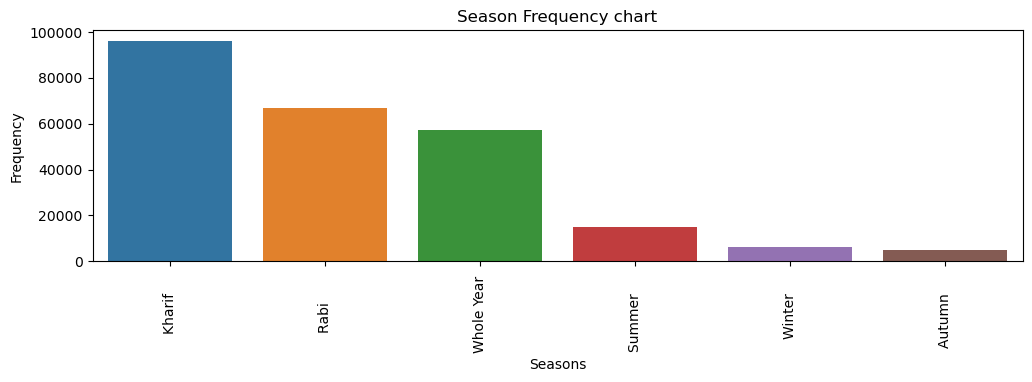

In [16]:
plt.figure(figsize = (12,3))
sns.countplot(data=data_copy, x = 'Season', order = season_count.index)
plt.xticks(rotation = 90)
plt.title('Season Frequency chart')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.show()

#### Crop Year vs Production

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Crop_Year', ylabel='Production'>

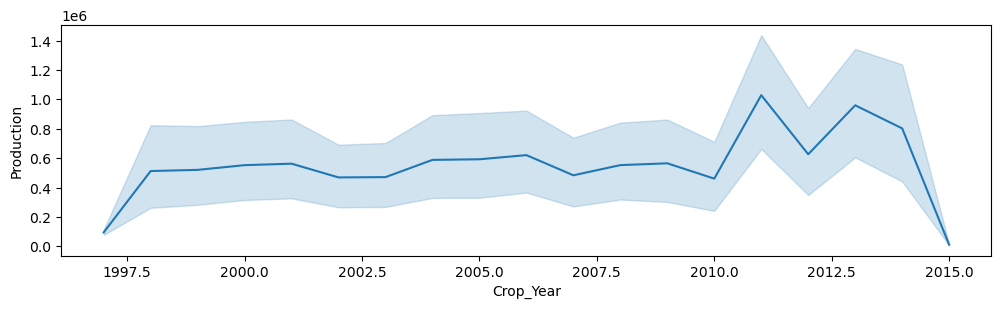

In [17]:
plt.figure(figsize = (12,3))
sns.lineplot(data = data_copy, x = 'Crop_Year', y = 'Production')

#### Region wise production trend

In [18]:
state_production = data_copy[['State_Name', 'Production']]
state_production = state_production.groupby('State_Name')['Production'].mean().round(2).sort_values(ascending = False).reset_index()
state_production.head()

,State_Name,Production
0,Kerala,23102910.56
1,Andaman and Nicobar Islands,3561641.69
2,Goa,2431723.56
3,Andhra Pradesh,1801608.34
4,Tamil Nadu,923399.06


#### Top 5 Productive States

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

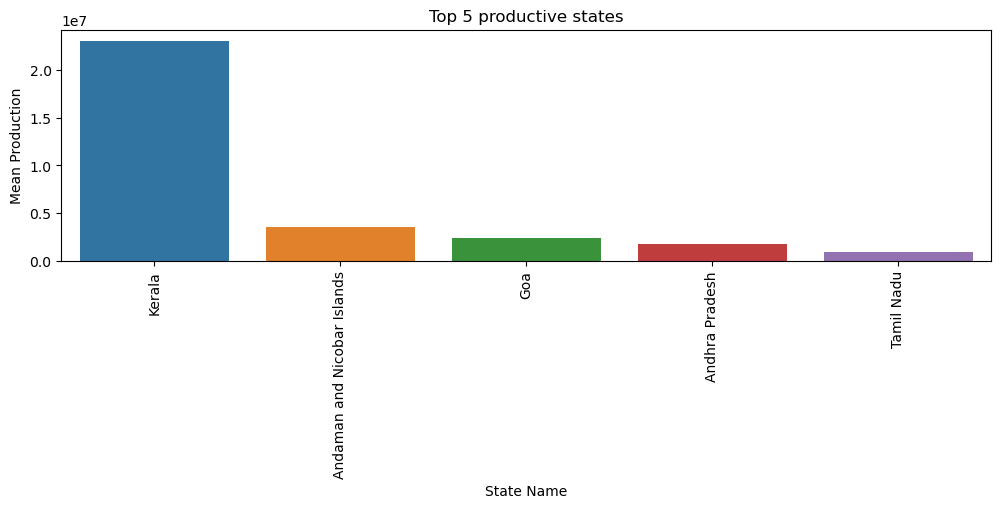

In [19]:
plt.figure(figsize = (12,3))
sns.barplot(data = state_production[:5], x = 'State_Name', y = 'Production')
plt.xticks(rotation = 90)
plt.title('Top 5 productive states')
plt.xlabel('State Name')
plt.ylabel('Mean Production')
plt.show()

#### Bottom 5 productive states 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

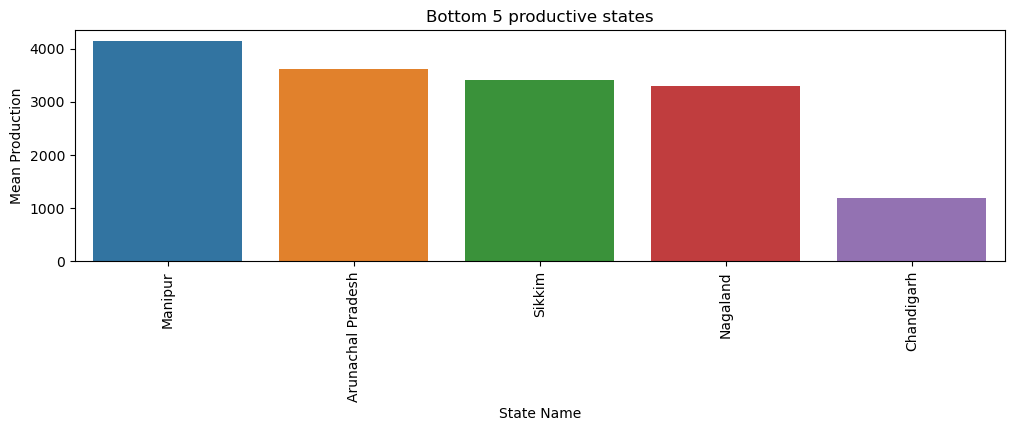

In [20]:
plt.figure(figsize = (12,3))
sns.barplot(data = state_production[-5:], x = 'State_Name', y = 'Production')
plt.xticks(rotation = 90)
plt.title('Bottom 5 productive states')
plt.xlabel('State Name')
plt.ylabel('Mean Production')
plt.show()

#### Top 5 productive districts

In [21]:
district_production = data_copy[['District_Name', 'Production']]
district_production = district_production.groupby('District_Name')['Production'].mean().round(2).sort_values(ascending = False).reset_index()
district_production.head()

,District_Name,Production
0,KOZHIKODE,55148174.20
1,MALAPPURAM,47586642.35
2,THIRUVANANTHAPURAM,36095546.36
3,THRISSUR,35383311.46
4,KANNUR,32851511.35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

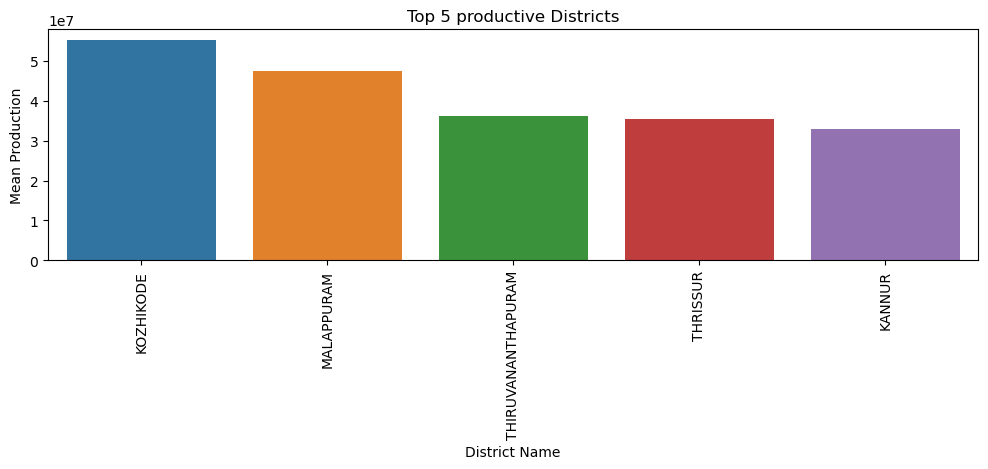

In [22]:
plt.figure(figsize = (12,3))
sns.barplot(data = district_production[:5], x = 'District_Name', y = 'Production')
plt.xticks(rotation = 90)
plt.title('Top 5 productive Districts')
plt.xlabel('District Name')
plt.ylabel('Mean Production')
plt.show()

#### Bottom 5 productive districts

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

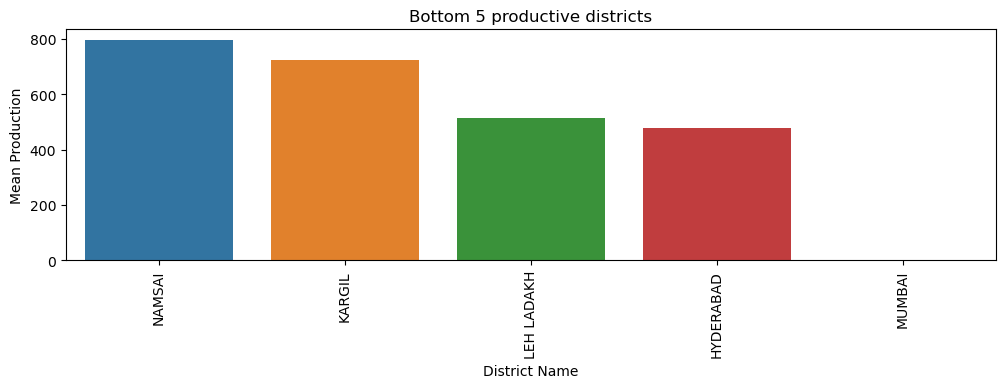

In [23]:
plt.figure(figsize = (12,3))
sns.barplot(data = district_production[-5:], x = 'District_Name', y = 'Production')
plt.xticks(rotation = 90)
plt.title('Bottom 5 productive districts')
plt.xlabel('District Name')
plt.ylabel('Mean Production')
plt.show()

#### Season production chart

In [24]:
season_production = data_copy[['Season', 'Production']]
season_production = season_production.groupby('Season')['Production'].mean().round(2).sort_values(ascending = False).reset_index()
season_production.head()

,Season,Production
0,Whole Year,2395011.98
1,Winter,71826.42
2,Kharif,42743.34
3,Rabi,31011.00
4,Autumn,13065.67


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

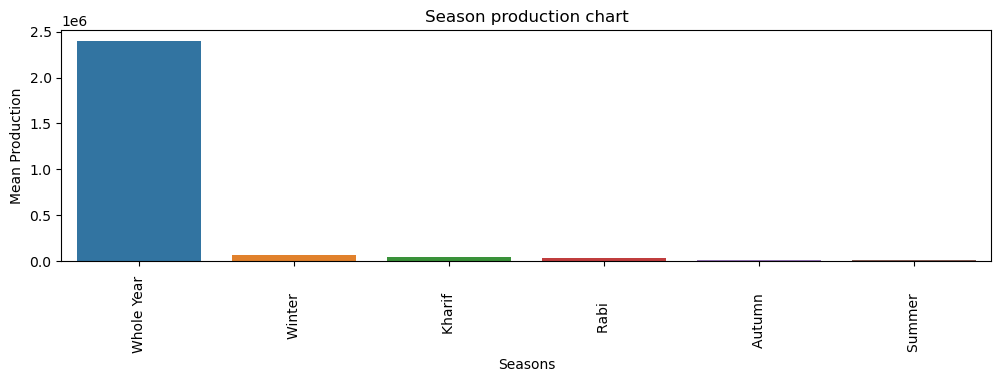

In [25]:
plt.figure(figsize = (12,3))
sns.barplot(data = season_production, x = 'Season', y = 'Production')
plt.xticks(rotation = 90)
plt.title('Season production chart')
plt.xlabel('Seasons')
plt.ylabel('Mean Production')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

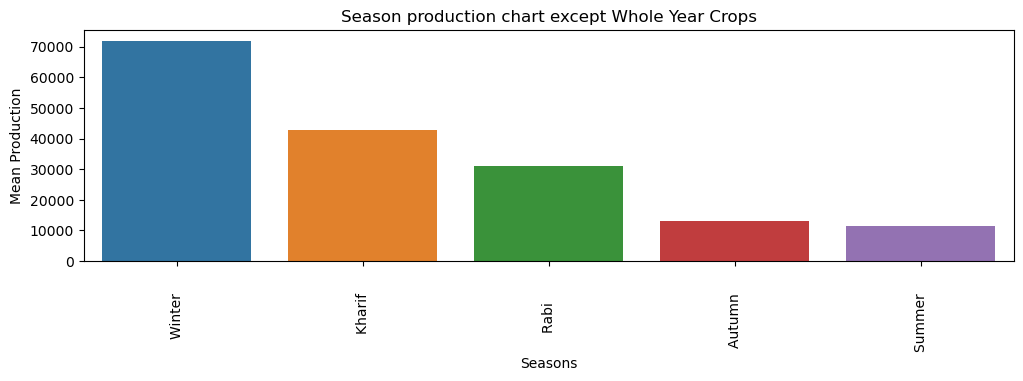

In [26]:
plt.figure(figsize = (12,3))
sns.barplot(data = season_production[-5:], x = 'Season', y = 'Production')
plt.xticks(rotation = 90)
plt.title('Season production chart except Whole Year Crops')
plt.xlabel('Seasons')
plt.ylabel('Mean Production')
plt.show()

#### Most grown crops 

In [27]:
crop = data_copy[['Crop','Production']].copy()

In [28]:
crop = crop.groupby('Crop')['Production'].sum().sort_values(ascending = False).reset_index()

In [29]:
crop.head()

,Crop,Production
0,Coconut,1.300369e+11
1,Sugarcane,5.760813e+09
2,Rice,1.606185e+09
3,Wheat,1.335888e+09
4,Potato,4.537802e+08


In [30]:
data_copy["Crop"].value_counts()[:5]

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: Crop, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

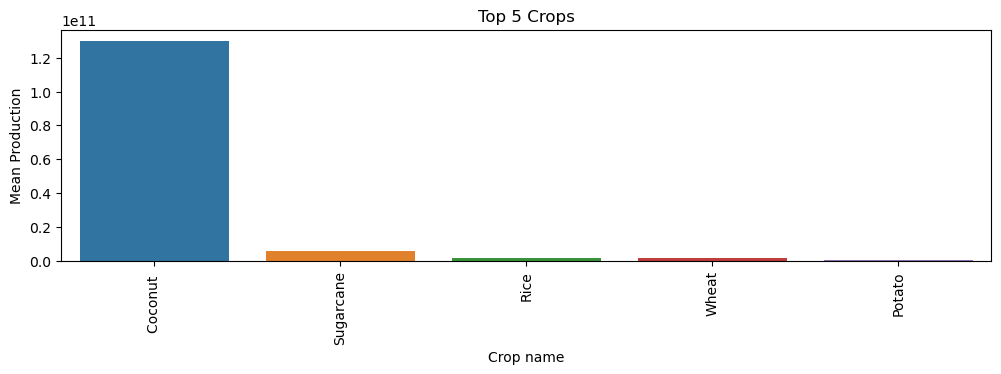

In [31]:
plt.figure(figsize = (12,3))
sns.barplot(data = crop[:5], x='Crop', y = 'Production')
plt.xticks(rotation = 90)
plt.title('Top 5 Crops')
plt.xlabel('Crop name')
plt.ylabel('Mean Production')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

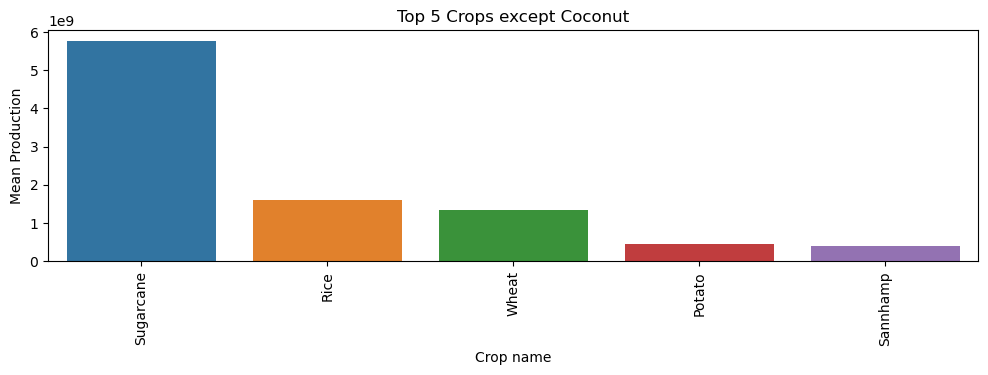

In [32]:
plt.figure(figsize = (12,3))
sns.barplot(data = crop[1:6], x='Crop', y = 'Production')
plt.xticks(rotation = 90)
plt.title('Top 5 Crops except Coconut')
plt.xlabel('Crop name')
plt.ylabel('Mean Production')
plt.show()

In [33]:
season_crop = data_copy[['Season','Crop','Production']].copy()
season_crop = season_crop.groupby(['Season', 'Crop'])['Production'].sum().sort_values(ascending = False).reset_index()
season_crop.head()

,Season,Crop,Production
0,Whole Year,Coconut,1.300366e+11
1,Whole Year,Sugarcane,3.970305e+09
2,Kharif,Sugarcane,1.774444e+09
3,Rabi,Wheat,1.324386e+09
4,Kharif,Rice,9.422550e+08


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

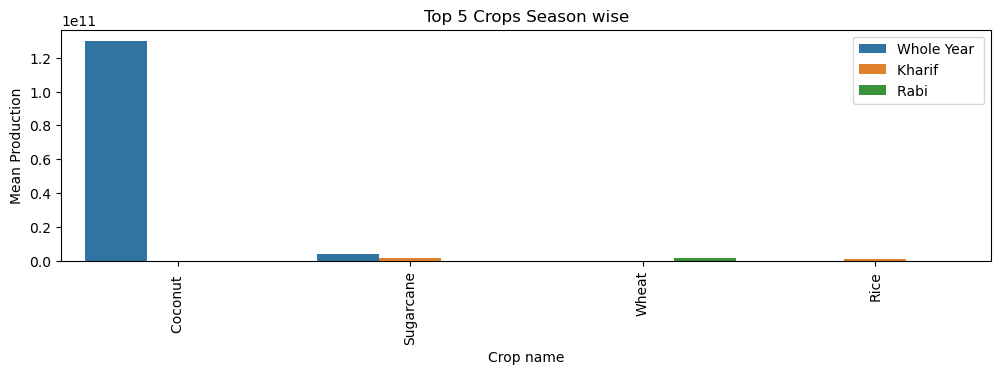

In [34]:
plt.figure(figsize = (12,3))
sns.barplot(data = season_crop[:5], x='Crop', y = 'Production', hue = 'Season')
plt.xticks(rotation = 90)
plt.title('Top 5 Crops Season wise')
plt.xlabel('Crop name')
plt.ylabel('Mean Production')
plt.legend(loc= 'upper right')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

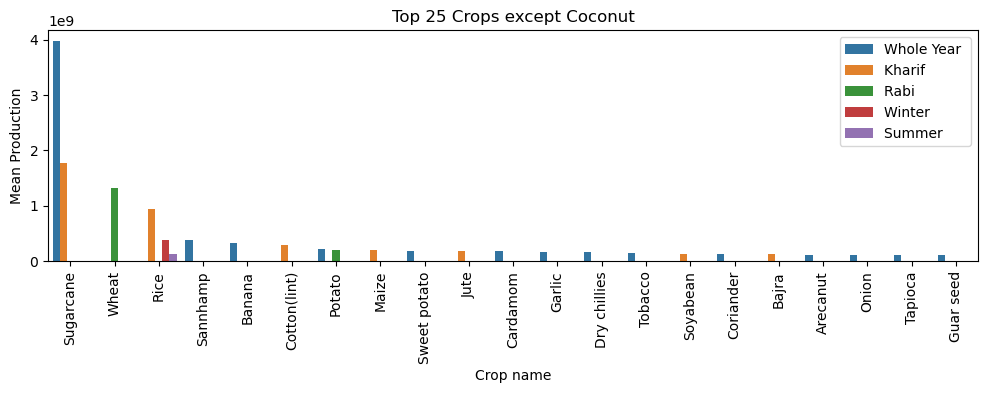

In [35]:
plt.figure(figsize = (12,3))
sns.barplot(data = season_crop[1:26], x='Crop', y = 'Production', hue = 'Season')
plt.xticks(rotation = 90)
plt.title('Top 25 Crops except Coconut')
plt.xlabel('Crop name')
plt.ylabel('Mean Production')
plt.legend(loc = 'upper right')
plt.show()

#### Most grown seasonise crops except coconut

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

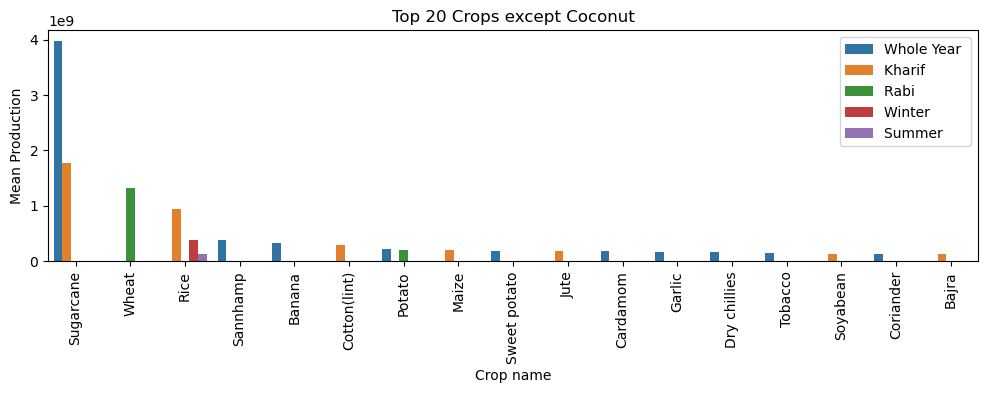

In [36]:
plt.figure(figsize = (12,3))
sns.barplot(data = season_crop[1:22], x='Crop', y = 'Production', hue = 'Season')
plt.xticks(rotation = 90)
plt.title('Top 20 Crops except Coconut')
plt.xlabel('Crop name')
plt.ylabel('Mean Production')
plt.legend(loc='upper right')
plt.show()

### Analysis of Top produced crops

#### 1. Rice

In [37]:
rice_df = data_copy[data_copy["Crop"]=="Rice"].sort_values(by = 'Production', ascending = False)
print(rice_df.shape)
rice_df[:3]

(15104, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
164232,Punjab,SANGRUR,2004,Kharif,Rice,367000.0,1710000.0
164259,Punjab,SANGRUR,2006,Kharif,Rice,362000.0,1637000.0
164245,Punjab,SANGRUR,2005,Kharif,Rice,367000.0,1625000.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Season', ylabel='Production'>

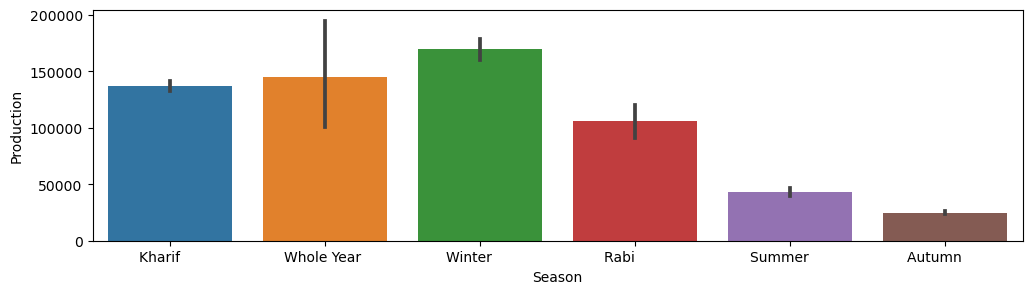

In [38]:
plt.figure(figsize = (12,3))
sns.barplot(data=rice_df, x = "Season",y = "Production")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

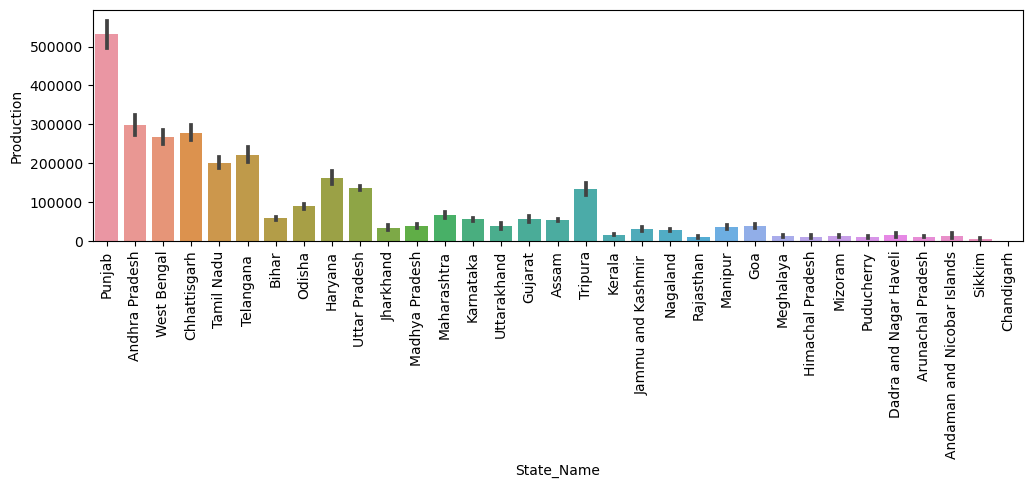

In [39]:
plt.figure(figsize = (12,3))
sns.barplot(data=rice_df, x="State_Name",y="Production")
plt.xticks(rotation=90)
plt.show()

In [40]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["Production_Percentage"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,Production_Percentage
58,BARDHAMAN,34239976.0,2.131758
375,MEDINIPUR WEST,29192719.0,1.817519
613,WEST GODAVARI,27845309.0,1.733630
169,EAST GODAVARI,24690929.0,1.537241
495,SANGRUR,24448000.0,1.522116


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

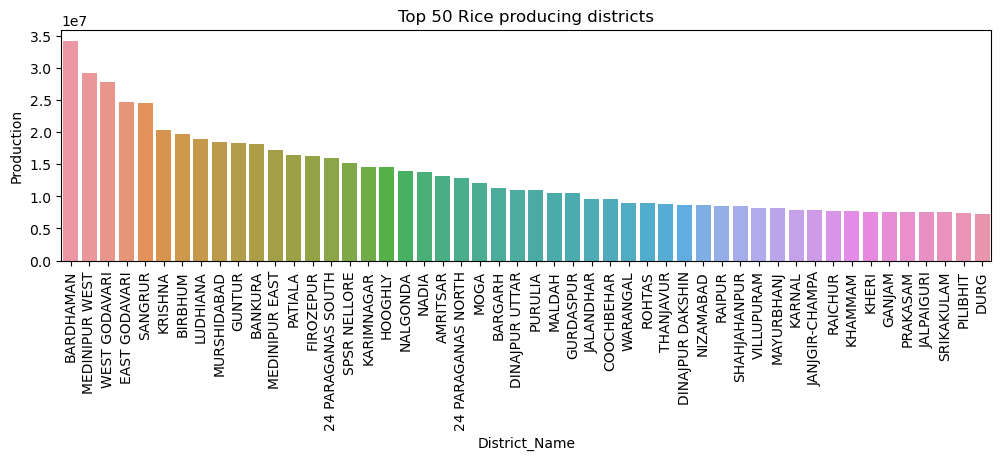

In [41]:
plt.figure(figsize=(12,3))
sns.barplot(data=top_rice_pro_dis[:50], x = "District_Name",y = "Production")
plt.xticks(rotation=90)
plt.title('Top 50 Rice producing districts')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

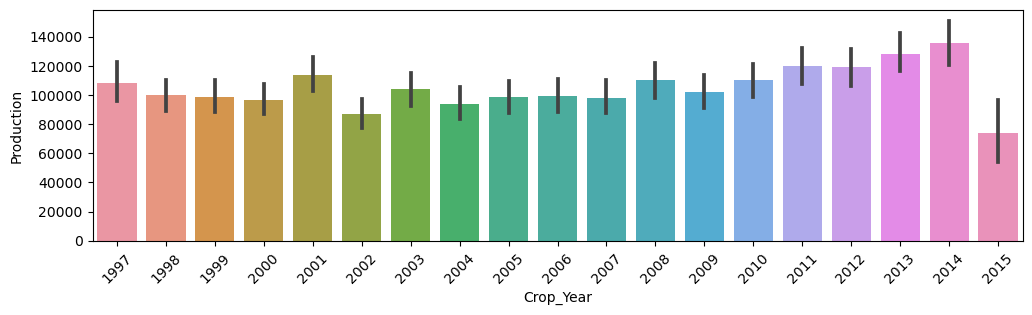

In [42]:
plt.figure(figsize=(12,3))
sns.barplot(data=rice_df,x="Crop_Year",y = "Production")
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x300 with 0 Axes>

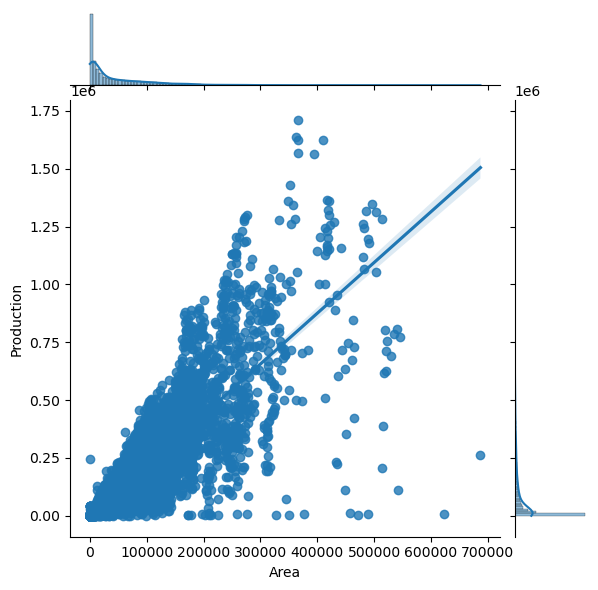

In [43]:
plt.figure(figsize = (12,3))
sns.jointplot(data=rice_df,x="Area",y="Production",kind="reg")

#### 2. Coconut

In [44]:
coc_df = data_copy[data_copy["Crop"]=="Coconut "].sort_values(by = 'Production', ascending = False)
print(coc_df.shape)
coc_df[:3]

(1985, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.0,1.250800e+09
178331,Tamil Nadu,COIMBATORE,2013,Whole Year,Coconut,84531.0,1.212000e+09
100654,Kerala,MALAPPURAM,2012,Whole Year,Coconut,102417.0,1.125000e+09


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Season', ylabel='Production'>

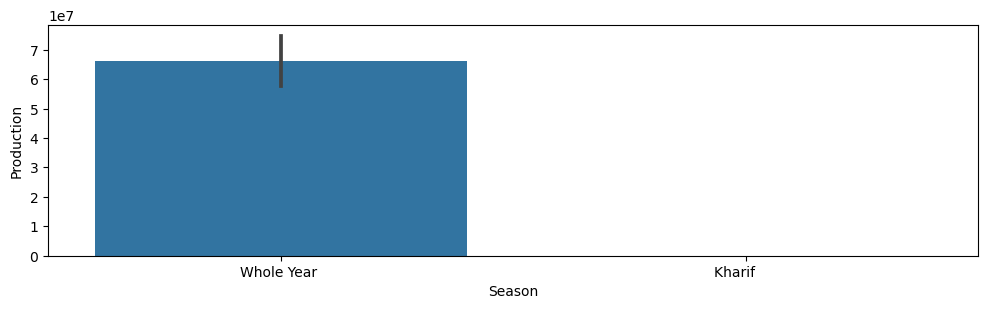

In [45]:
plt.figure(figsize = (12,3))
sns.barplot(data=coc_df, x = "Season",y = "Production")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

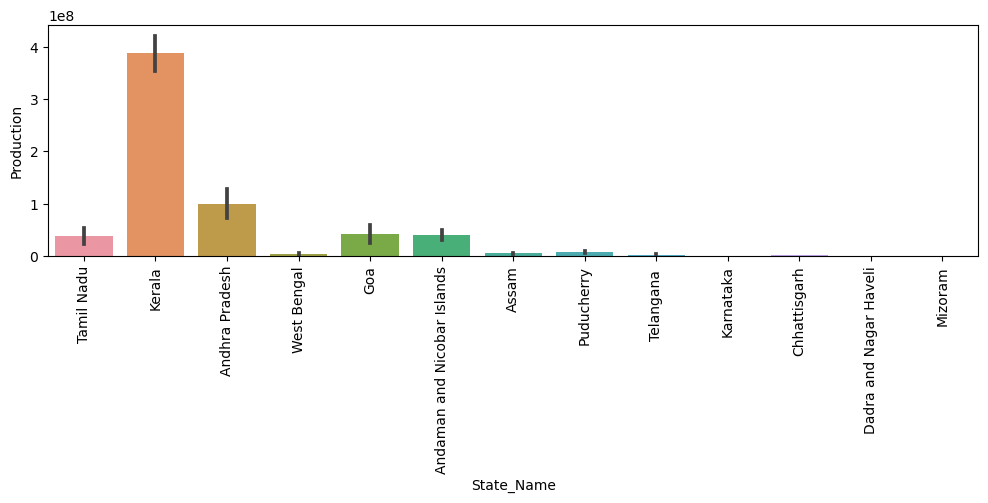

In [46]:
plt.figure(figsize = (12,3))
sns.barplot(data=coc_df,x="State_Name",y="Production")
plt.xticks(rotation=90)
plt.show()

In [47]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
80,KOZHIKODE,1.527871e+10,11.749517
89,MALAPPURAM,1.451252e+10,11.160308
134,THIRUVANANTHAPURAM,1.001337e+10,7.700404
136,THRISSUR,9.920739e+09,7.629173
66,KANNUR,9.780310e+09,7.521181


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

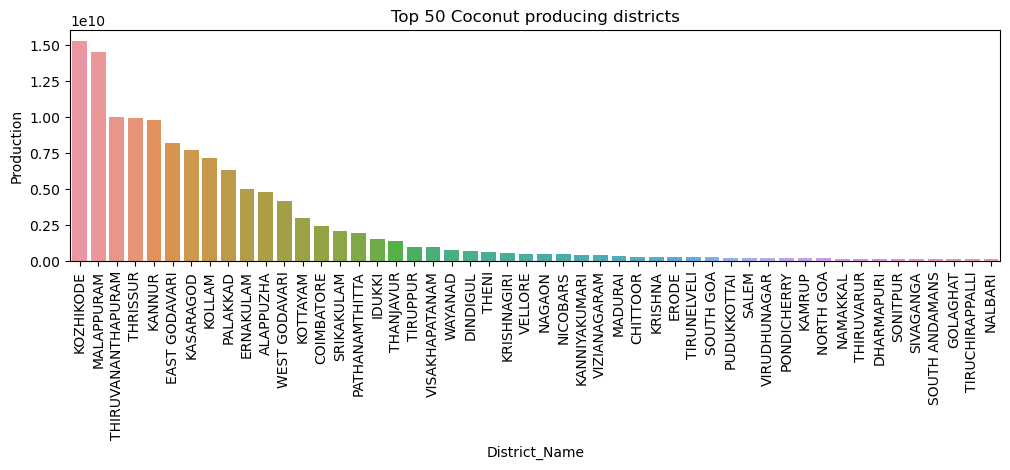

In [48]:
plt.figure(figsize = (12,3))
sns.barplot(data=top_coc_pro_dis[:50],x="District_Name",y="Production")
plt.xticks(rotation=90)
plt.title('Top 50 Coconut producing districts')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

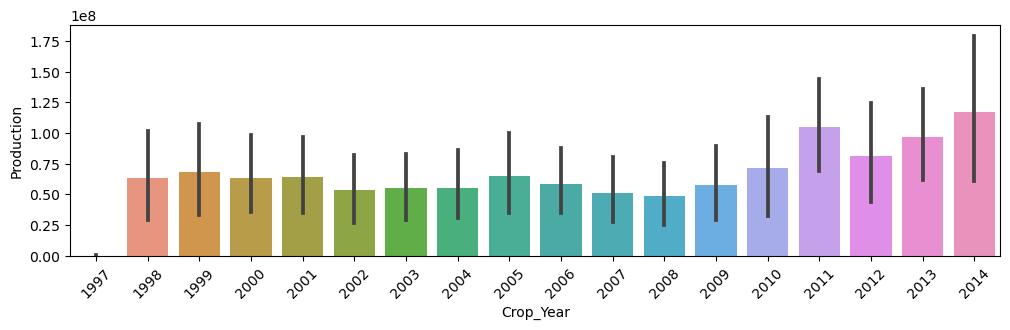

In [49]:
plt.figure(figsize = (12,3))
sns.barplot(data=coc_df, x="Crop_Year",y="Production")
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

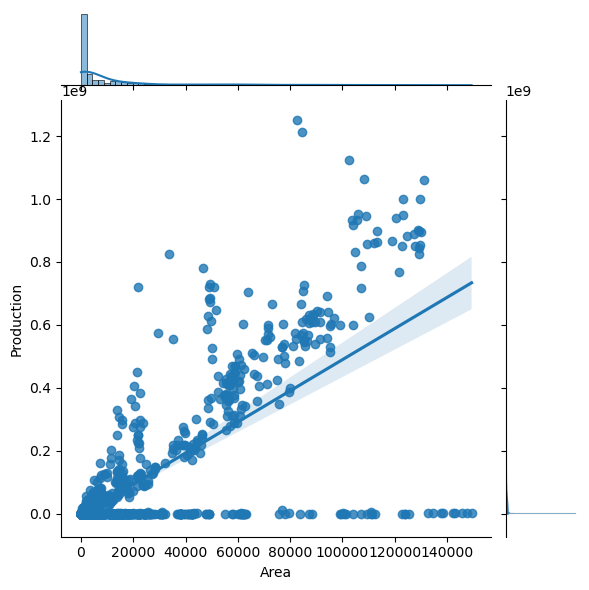

In [50]:
sns.jointplot(data=coc_df, x = "Area",y = "Production",kind="reg")

#### 3. Sugarcane

In [51]:
sug_df = data_copy[data_copy["Crop"]=="Sugarcane"].sort_values(by = 'Production', ascending = False)
print(sug_df.shape)
sug_df[:3]

(7921, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
190249,Tamil Nadu,VILLUPURAM,1997,Whole Year,Sugarcane,33175.0,37158000.0
178362,Tamil Nadu,CUDDALORE,1997,Whole Year,Sugarcane,23826.0,28322000.0
179974,Tamil Nadu,ERODE,1997,Whole Year,Sugarcane,24112.0,26930000.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Season', ylabel='Production'>

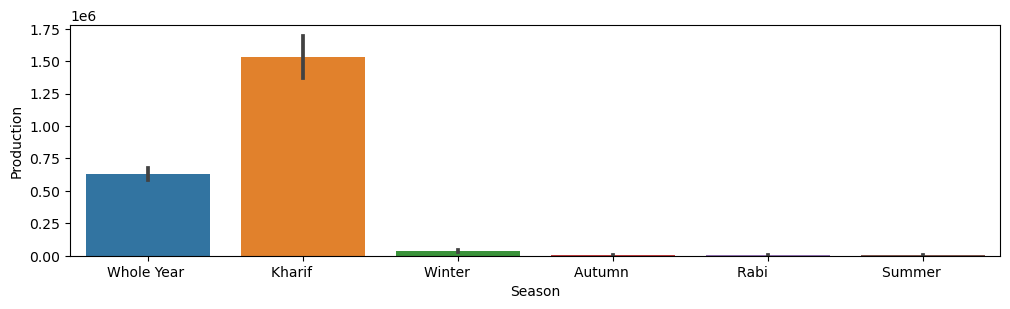

In [52]:
plt.figure(figsize = (12,3))
sns.barplot(data=sug_df, x="Season",y="Production")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

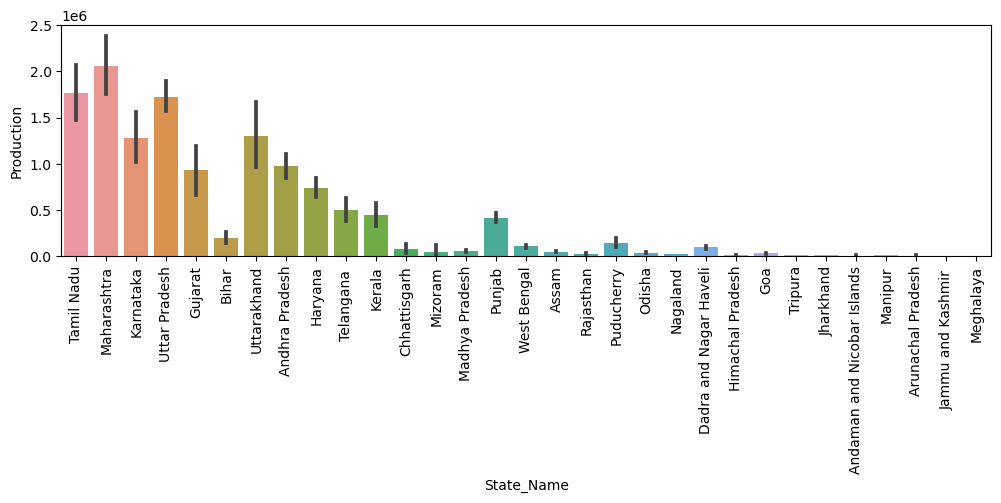

In [53]:
plt.figure(figsize = (12,3))
sns.barplot(data=sug_df, x = "State_Name",y = "Production")
plt.xticks(rotation=90)
plt.show()

In [54]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.490665
81,BIJNOR,230907185.0,4.008240
283,KHERI,224383685.0,3.895001
63,BELGAUM,198207649.0,3.440620
294,KOLHAPUR,157210426.0,2.728963


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

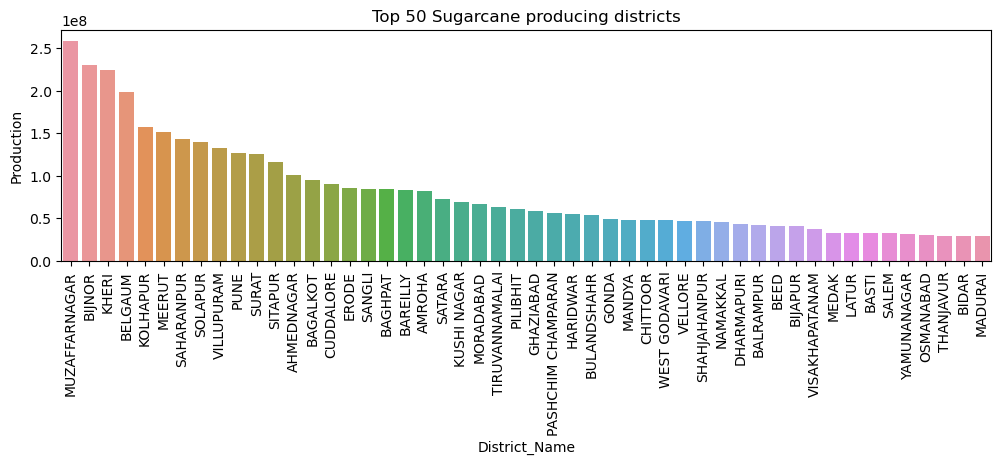

In [55]:
plt.figure(figsize = (12,3))
sns.barplot(data=top_sug_pro_dis[:50],x="District_Name",y="Production")
plt.xticks(rotation=90)
plt.title('Top 50 Sugarcane producing districts')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

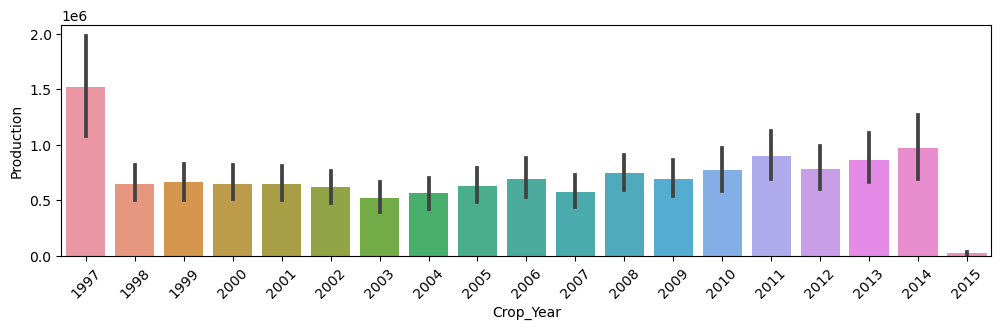

In [56]:
plt.figure(figsize = (12,3))
sns.barplot(data=sug_df,x ="Crop_Year",y = "Production")
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

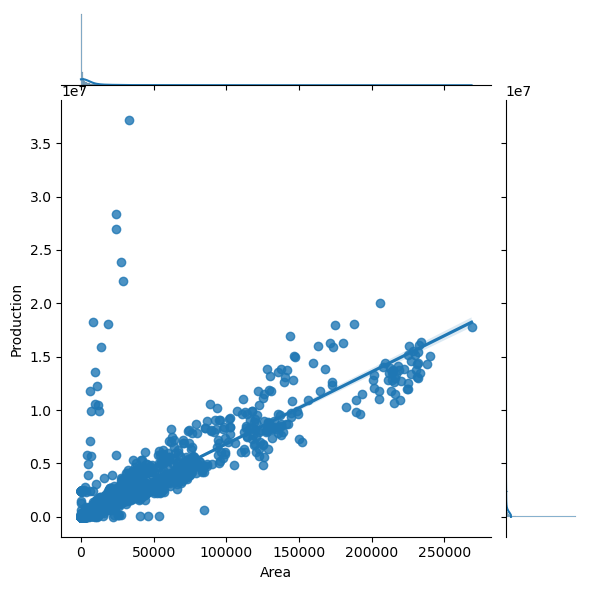

In [57]:
sns.jointplot(data=sug_df,x ="Area",y= "Production",kind="reg")

In [58]:
data_copy['Crop'] = data_copy['Crop'].str.replace(" ", "")

In [59]:
cc=data_copy['Crop']
def cat_crop(cc):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar']:
        if cc==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)']:
        if cc==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if cc==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Tapioca','Soyabean','Horse-gram','Gram']:
        if cc==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion']:
        if cc==i:
            return 'Vegetables'
    for i in ['Perilla','Colocosia','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies']:
        if cc==i:
            return 'Species'
    for i in ['Jobster','Cond-spcs other']:
        if cc==i:
            return 'Other'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)']:
        if cc==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if cc==i:
            return 'Nuts'
    for i in ['Rubber']:
        if cc==i:
            return 'Natural Polymer'
    for i in ['Coffee']:
        if cc== i:
            return 'Coffee'
    for i in ['Tea']:
        if cc==i:
            return 'Tea'
    for i in ['Total foodgrain']:
        if cc==i:
            return 'Total foodgrain'
    for i in ['Pulses total']:
        if cc==i:
            return 'Pulses total'
    for i in ['Oilseeds total']:
        if cc==i:
            return 'Oilseeds total'
    for i in ['Paddy']:
        if cc==i:
            return 'Paddy'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum']:
        if cc==i:
            return 'Oilseeds'
    for i in ['Sannhamp']:
        if cc==i:
            return 'Fertile Plant'
    for i in ['Tobacco']:
        if cc==i:
            return 'Commercial'
    for i in ['Sugarcane']:
        if cc==i:
            return 'Sugarcane'

In [60]:
data_copy['cat_crop']=data_copy['Crop'].apply(cat_crop)

In [61]:
data_copy.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,OtherKharifpulses,2.0,1.0,None
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


In [62]:
data_copy["cat_crop"].value_counts()

Cereal             57844
Pulses             22601
Oilseeds           20357
Beans              17007
Vegetables         16846
Species            11548
Nuts               11492
Sugarcane           7921
fibres              7770
Fruits              6888
Commercial          2698
Fertile Plant       2395
Paddy                479
Tea                   62
Natural Polymer       29
Other                  9
Coffee                 6
Name: cat_crop, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

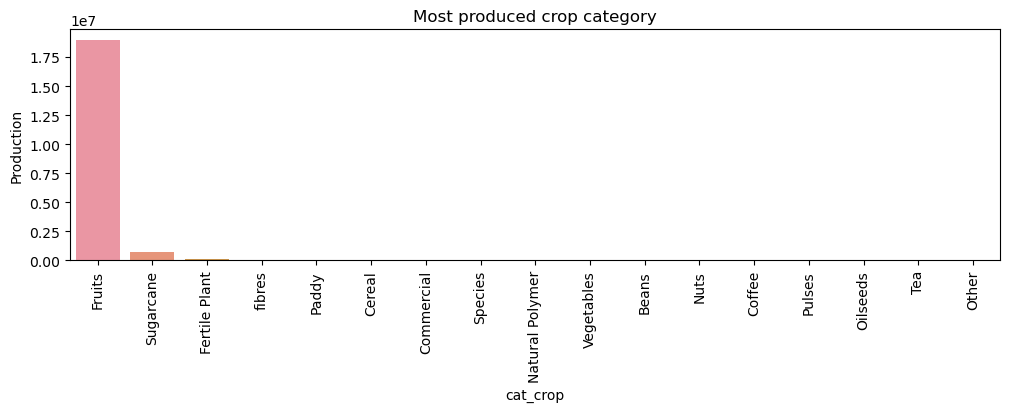

In [89]:
plt.figure(figsize = (12,3))
data_grp = data_copy.groupby('cat_crop')['Production'].mean().sort_values(ascending = False).reset_index()
sns.barplot(data = data_grp, x = 'cat_crop', y = 'Production')
plt.xticks(rotation=90)
plt.title('Most produced crop category')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

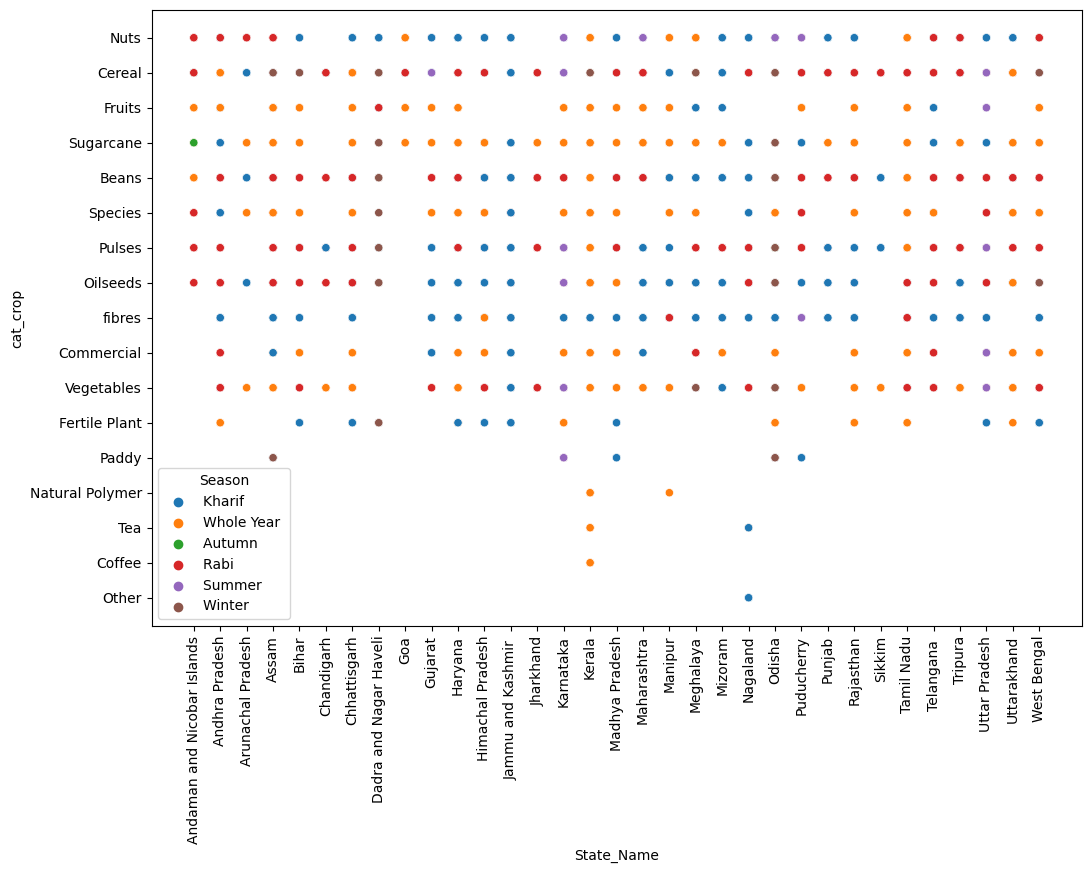

In [66]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=data_copy,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

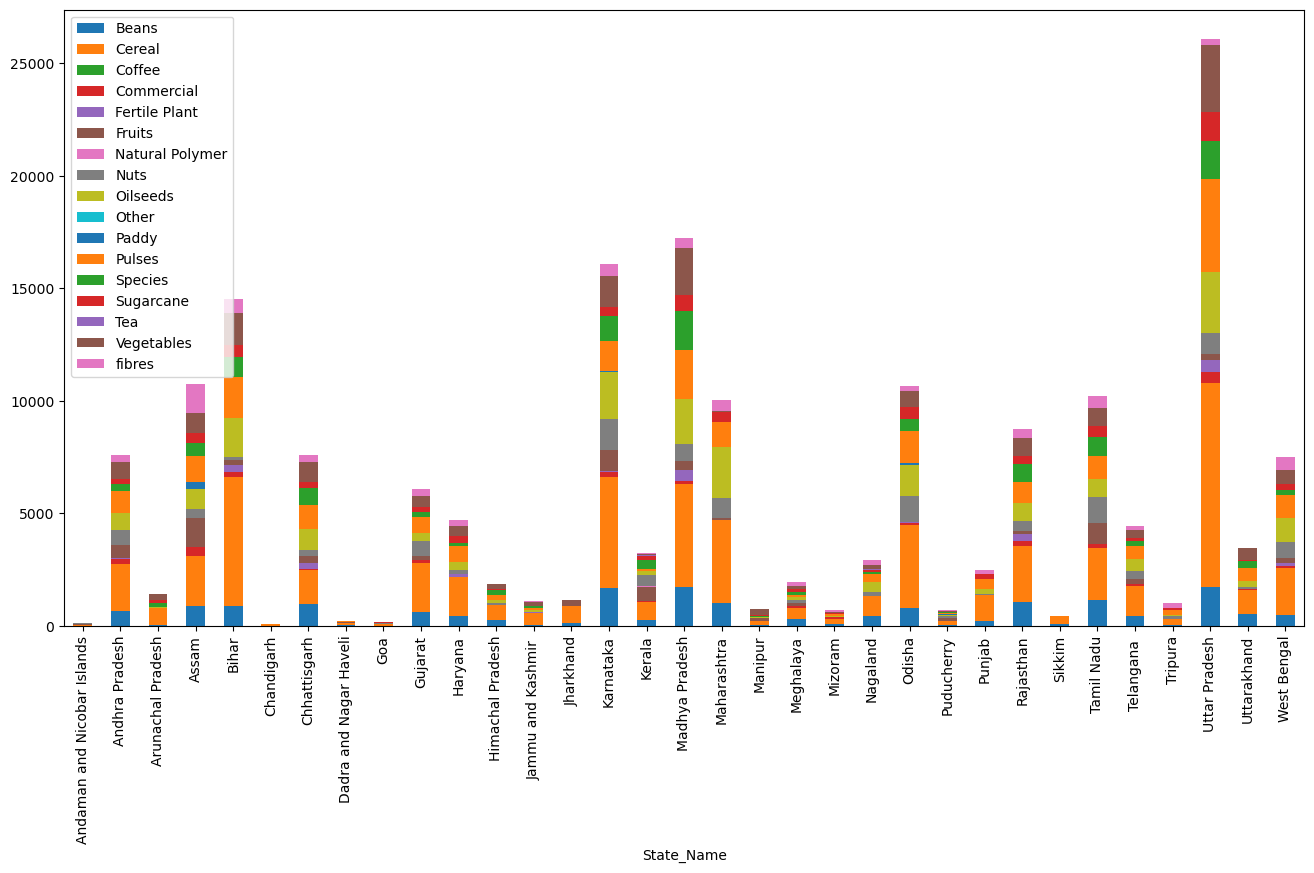

In [67]:
plt.figure(figsize = (12,8))
df2 = pd.crosstab(data_copy['State_Name'], data_copy['cat_crop'])
df2.plot(kind='bar', stacked=True, figsize = (16,8))
plt.legend(loc = 'upper left')

In [68]:
data_copy['Season'] = data_copy['Season'].str.replace(" ", "")

#### 1. Whole Year Crops

In [69]:
wy_df = data_copy[data_copy["Season"]=="WholeYear"].sort_values(by = 'Production', ascending = False)
print(wy_df.shape)
wy_df[:3]

(57305, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
178273,Tamil Nadu,COIMBATORE,2011,WholeYear,Coconut,82704.0,1.250800e+09,Fruits
178331,Tamil Nadu,COIMBATORE,2013,WholeYear,Coconut,84531.0,1.212000e+09,Fruits
100654,Kerala,MALAPPURAM,2012,WholeYear,Coconut,102417.0,1.125000e+09,Fruits


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

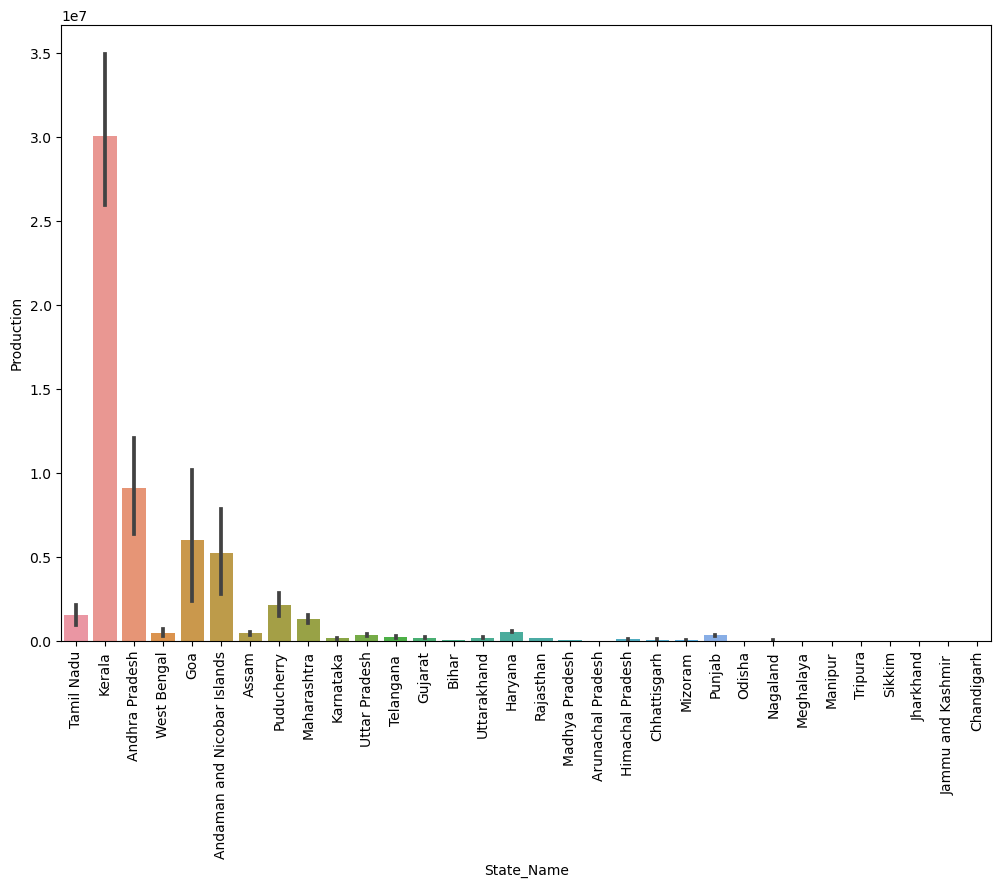

In [70]:
plt.figure(figsize = (12,8))
sns.barplot(data=wy_df, x = "State_Name",y = "Production")
plt.xticks(rotation=90)
plt.show()

In [71]:
top_wy_pro_dis = wy_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_wy_pro_dis[:5]
sum_max = top_wy_pro_dis["Production"].sum()
top_wy_pro_dis["precent_of_pro"] = top_wy_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_wy_pro_dis[:5]

,District_Name,Production,precent_of_pro
317,KOZHIKODE,1.533093e+10,11.170390
352,MALAPPURAM,1.456100e+10,10.609404
555,THIRUVANANTHAPURAM,1.007044e+10,7.337503
558,THRISSUR,9.941421e+09,7.243497
273,KANNUR,9.855007e+09,7.180534


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

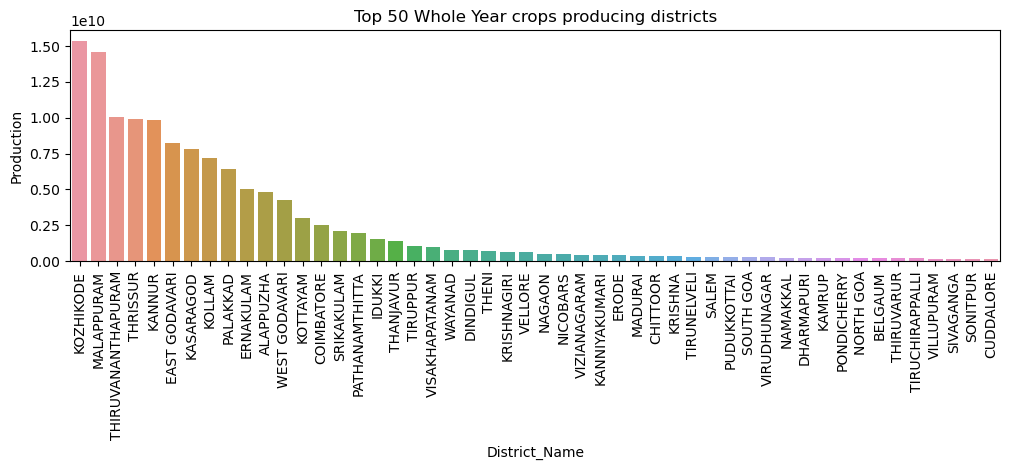

In [72]:
plt.figure(figsize = (12,3))
sns.barplot(data=top_wy_pro_dis[:50],x="District_Name",y="Production")
plt.xticks(rotation=90)
plt.title('Top 50 Whole Year crops producing districts')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

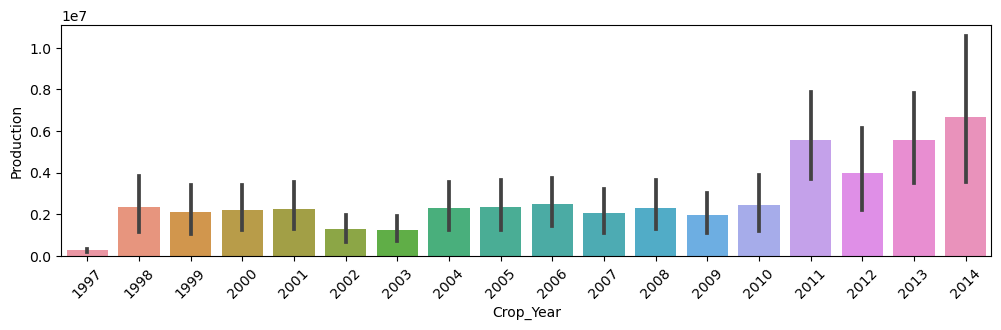

In [73]:
plt.figure(figsize = (12,3))
sns.barplot(data=wy_df,x ="Crop_Year",y = "Production")
plt.xticks(rotation=45)
plt.show()

In [74]:
top_wy_pro_crop = wy_df.groupby(["Crop", "cat_crop"])["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_wy_pro_crop[:5]
sum_max = top_wy_pro_crop["Production"].sum()
top_wy_pro_crop["Crop_precent_of_pro"] = top_wy_pro_crop["Production"].map(lambda x:(x/sum_max)*100)
top_wy_pro_crop[:5]

,Crop,cat_crop,Production,Crop_precent_of_pro
15,Coconut,Fruits,1.300366e+11,95.334032
54,Sugarcane,Sugarcane,3.970305e+09,2.910759
51,Sannhamp,Fertile Plant,3.906533e+08,0.286401
4,Banana,Fruits,3.226938e+08,0.236577
45,Potato,Vegetables,2.272416e+08,0.166598


#### 2. Kharif Crops

In [75]:
kh_df = data_copy[data_copy["Season"]== "Kharif"].sort_values(by = 'Production', ascending = False)
print(wy_df.shape)
kh_df[:3]

(57305, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
218796,Uttar Pradesh,KHERI,2014,Kharif,Sugarcane,268653.0,17757963.0,Sugarcane
224218,Uttar Pradesh,MUZAFFARNAGAR,2009,Kharif,Sugarcane,233825.0,16421997.0,Sugarcane
224144,Uttar Pradesh,MUZAFFARNAGAR,2006,Kharif,Sugarcane,232610.0,16087308.0,Sugarcane


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

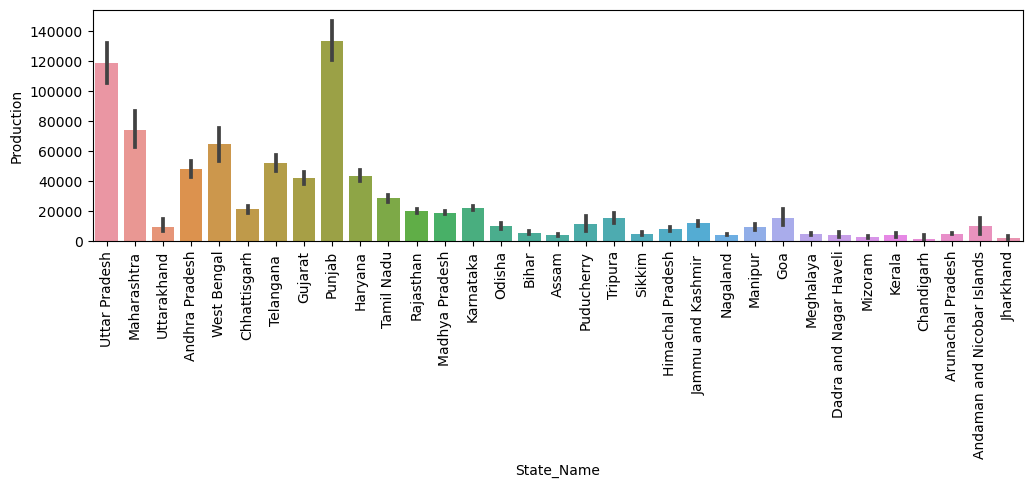

In [76]:
plt.figure(figsize = (12,3))
sns.barplot(data=kh_df, x = "State_Name",y = "Production")
plt.xticks(rotation=90)
plt.show()

In [77]:
top_kh_pro_dis = kh_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_kh_pro_dis[:5]
sum_max = top_kh_pro_dis["Production"].sum()
top_kh_pro_dis["precent_of_pro"] = top_kh_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_kh_pro_dis[:5]

,District_Name,Production,precent_of_pro
393,MUZAFFARNAGAR,1.611110e+08,3.928324
305,KHERI,1.580960e+08,3.854810
89,BIJNOR,1.438024e+08,3.506293
381,MEERUT,9.878978e+07,2.408763
494,SAHARANPUR,9.399601e+07,2.291878


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

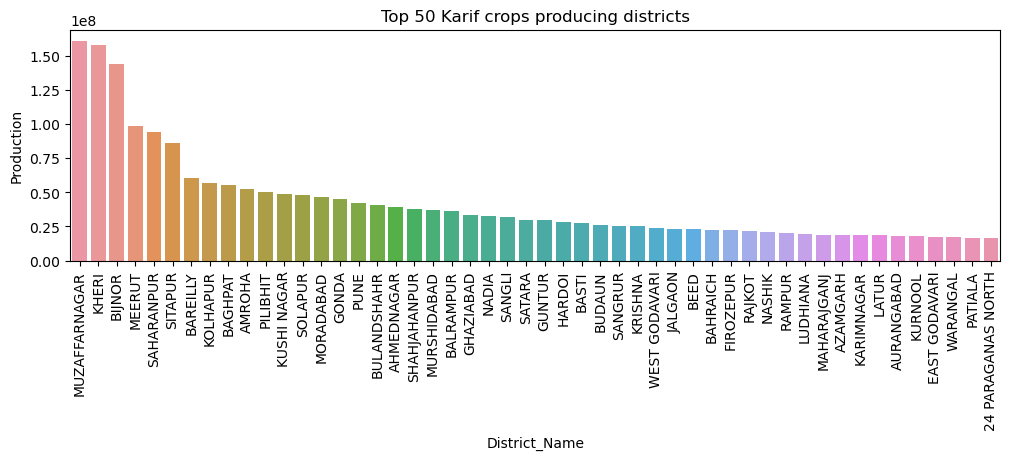

In [78]:
plt.figure(figsize = (12,3))
sns.barplot(data=top_kh_pro_dis[:50],x="District_Name",y="Production")
plt.xticks(rotation=90)
plt.title('Top 50 Karif crops producing districts')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

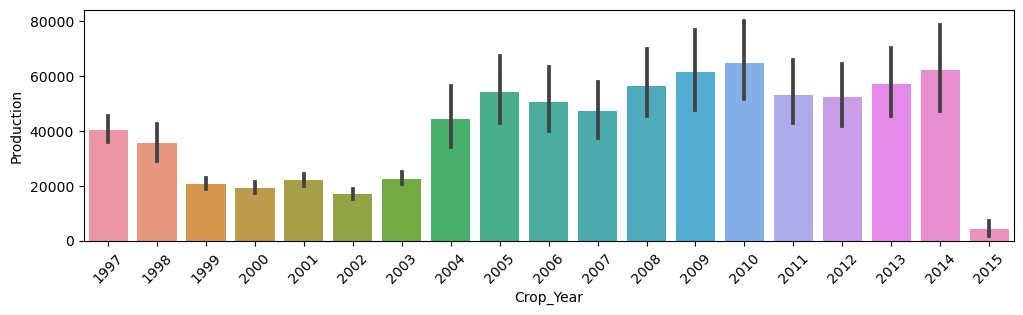

In [79]:
plt.figure(figsize = (12,3))
sns.barplot(data=kh_df,x ="Crop_Year",y = "Production")
plt.xticks(rotation=45)
plt.show()

In [80]:
top_kh_pro_crop = kh_df.groupby(["Crop", 'cat_crop'])["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_kh_pro_crop[:5]
sum_max = top_kh_pro_crop["Production"].sum()
top_kh_pro_crop["Crop_precent_of_pro"] = top_kh_pro_crop["Production"].map(lambda x:(x/sum_max)*100)
top_kh_pro_crop[:5]

,Crop,cat_crop,Production,Crop_precent_of_pro
49,Sugarcane,Sugarcane,1.774444e+09,44.495205
42,Rice,Cereal,9.422550e+08,23.627580
14,Cotton(lint),fibres,2.872159e+08,7.202101
30,Maize,Cereal,2.029589e+08,5.089311
24,Jute,fibres,1.827483e+08,4.582517


#### 3. Winter

In [81]:
win_df = data_copy[data_copy["Season"]=="Winter"].sort_values(by = 'Production', ascending = False)
print(wy_df.shape)
win_df[:3]

(57305, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
243856,West Bengal,MEDINIPUR WEST,2002,Winter,Potato,67046.0,1841788.0,Vegetables
241378,West Bengal,HOOGHLY,1999,Winter,Potato,73796.0,1725698.0,Vegetables
238206,West Bengal,BARDHAMAN,2002,Winter,Potato,51290.0,1423077.0,Vegetables


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

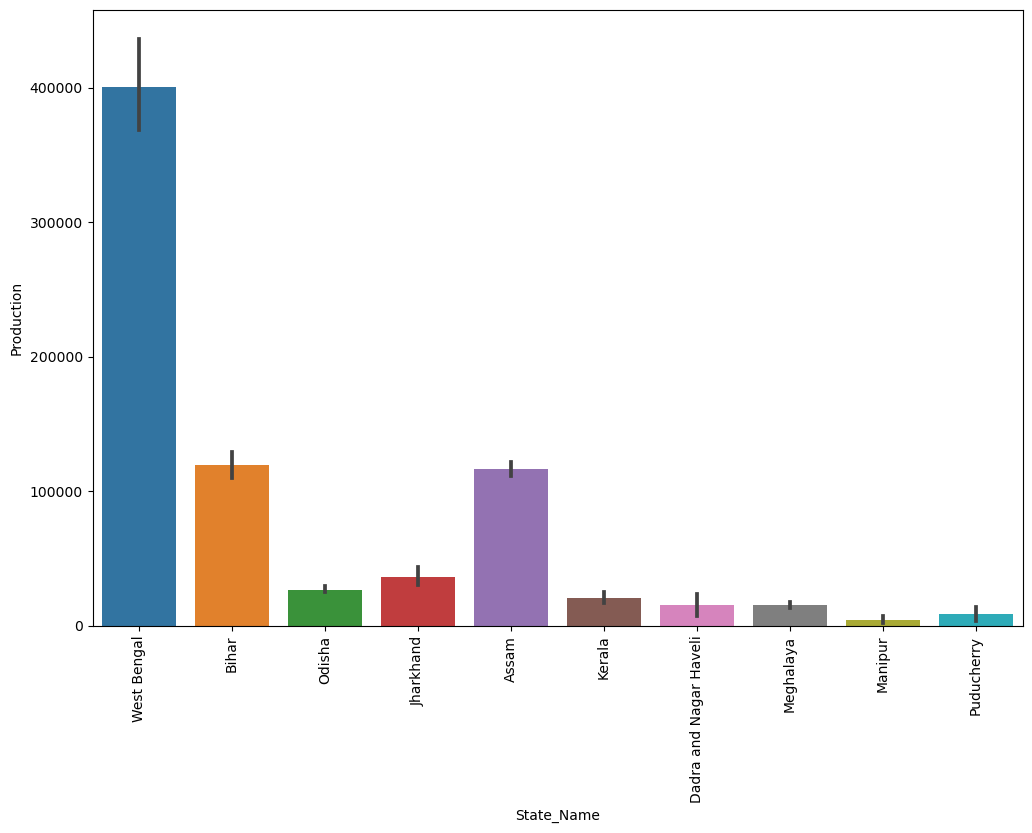

In [82]:
plt.figure(figsize = (12,8))
sns.barplot(data=win_df, x = "State_Name",y = "Production")
plt.xticks(rotation=90)
plt.show()

In [83]:
top_win_pro_dis = win_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_win_pro_dis[:5]
sum_max = top_win_pro_dis["Production"].sum()
top_win_pro_dis["precent_of_pro"] = top_win_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_win_pro_dis[:5]

,District_Name,Production,precent_of_pro
12,BARDHAMAN,23936971.0,5.501178
111,MEDINIPUR WEST,22946063.0,5.273448
19,BIRBHUM,16336418.0,3.754424
11,BANKURA,15911952.0,3.656874
1,24 PARAGANAS SOUTH,12163242.0,2.795348


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

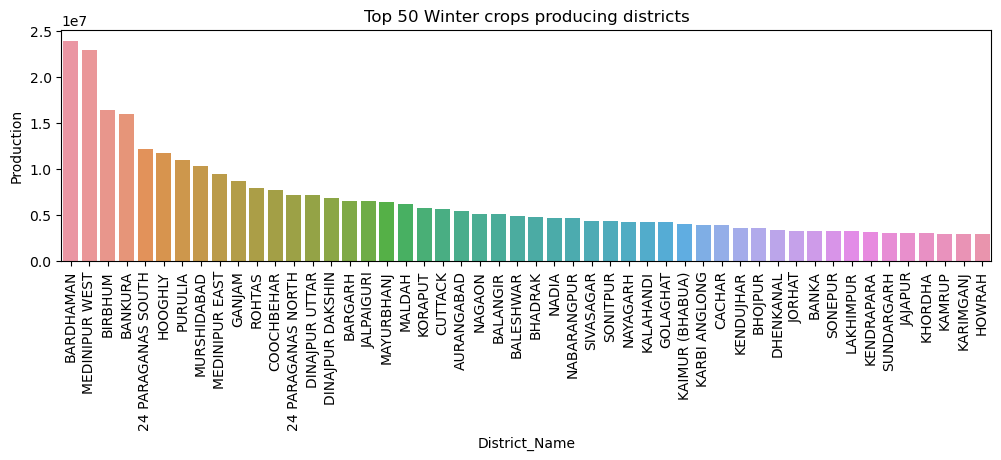

In [84]:
plt.figure(figsize = (12,3))
sns.barplot(data=top_win_pro_dis[:50],x="District_Name",y="Production")
plt.xticks(rotation=90)
plt.title('Top 50 Winter crops producing districts')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

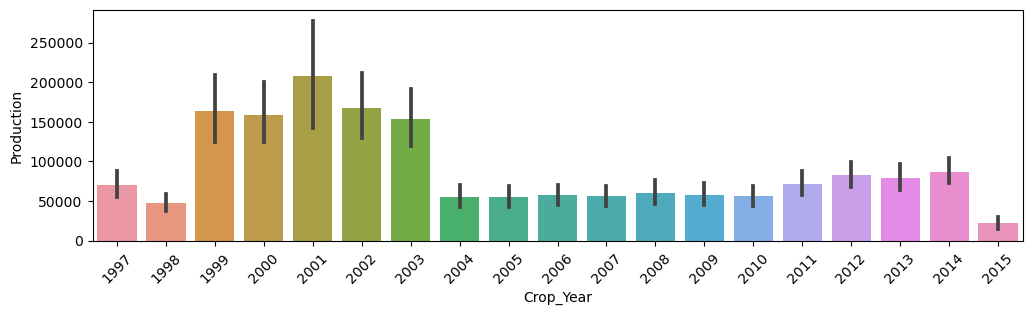

In [85]:
plt.figure(figsize = (12,3))
sns.barplot(data=win_df,x ="Crop_Year",y = "Production")
plt.xticks(rotation=45)
plt.show()

In [86]:
top_win_pro_crop = win_df.groupby(["Crop", 'cat_crop'])["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_win_pro_crop[:5]
sum_max = top_win_pro_crop["Production"].sum()
top_win_pro_crop["Crop_precent_of_pro"] = top_win_pro_crop["Production"].map(lambda x:(x/sum_max)*100)
top_win_pro_crop[:5]

,Crop,cat_crop,Production,Crop_precent_of_pro
12,Rice,Cereal,3.815695e+08,87.796643
9,Paddy,Paddy,1.931804e+07,4.444955
10,Potato,Vegetables,1.610274e+07,3.705135
16,Sugarcane,Sugarcane,1.601724e+07,3.685462
11,Ragi,Cereal,4.247813e+05,0.097739
